In [1]:
import flaremodel as fm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nus = np.logspace(10, 24, 100)

B, ne, R_in, p, g_min, g_max, incang, steps = 10, 1e6, 0, 3, 10., 2e4, -1, 64

edist = "powerlaw"
params = [p, g_min, g_max]

#This would give rough scaling with Thompson scattering approximation between synchrotron and SSC.
R = 2/(fm.sigma_T*ne*np.log(g_max/g_min)*g_min**(p-1))
print("R = %.1e cm" % R)

R = 4.0e+15 cm


In [3]:
homo_sp = fm.HomogeneousSphere(edist=edist)
rad_sp_cpu = fm.RadialSphere(edist=edist, target="cpu")
rad_sp_gpu = fm.RadialSphere(edist=edist, target="gpu")

/home/ydallilar/.miniconda3/envs/main/lib/python3.9/site-packages/flaremodel-1.0.0-py3.9-linux-x86_64.egg/flaremodel/geometry.py:298: UserWarning: Setting target to cpu. GPU functions not available...
  warnings.warn("Setting target to cpu. GPU functions not available...")


In [4]:
sync_h = homo_sp.compute_synchrotron(nus, ne, [R, incang], B, params)
sync_r = rad_sp_cpu.compute_synchrotron(nus, ne, [R, R_in, incang], B, params)

In [5]:
ssc_h = homo_sp.compute_SSC(nus, ne, [R, incang], B, params, gamma_min=g_min, gamma_max=g_max)
ssc_cpu = rad_sp_cpu.compute_SSC(nus, ne, [R, R_in, incang], B, params, gamma_min=g_min, gamma_max=g_max)
ssc_gpu = rad_sp_gpu.compute_SSC(nus, ne, [R, R_in, incang], B, params, gamma_min=g_min, gamma_max=g_max)

In [6]:
n_ph_fun = lambda nu: homo_sp._compute_photon_density(nu, ne, [R, incang], B, params)
ic_cpu = rad_sp_cpu.compute_IC(nus, ne, n_ph_fun, [R, R_in, incang], B, params, gamma_min=g_min, gamma_max=g_max)
ic_cpu = rad_sp_gpu.compute_IC(nus, ne, n_ph_fun, [R, R_in, incang], B, params, gamma_min=g_min, gamma_max=g_max)

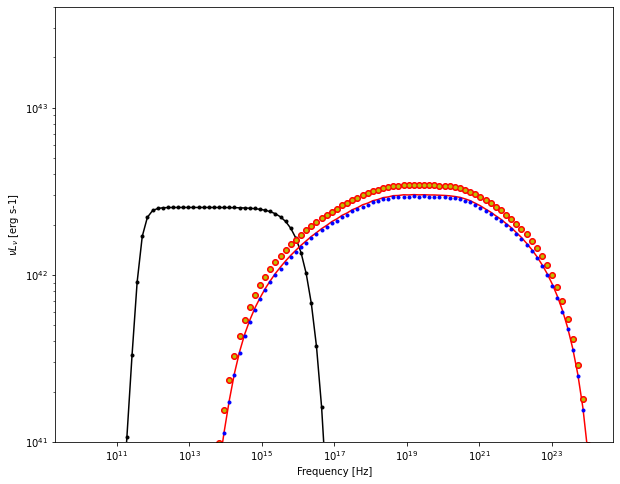

In [7]:
plt.figure(figsize=(10, 8))
plt.loglog(nus, sync_h*nus, 'k-')
plt.loglog(nus, ssc_h*nus, "r-")
plt.loglog(nus, sync_r*nus, 'k.')
plt.loglog(nus, ssc_cpu*nus, 'ro')
plt.loglog(nus, ssc_gpu*nus, 'y.')
plt.loglog(nus, ic_cpu*nus, 'b.')
plt.ylabel(r"$\nu L_\nu$ [erg s-1]")
plt.xlabel("Frequency [Hz]")
plt.ylim([1e41, 4e43]);

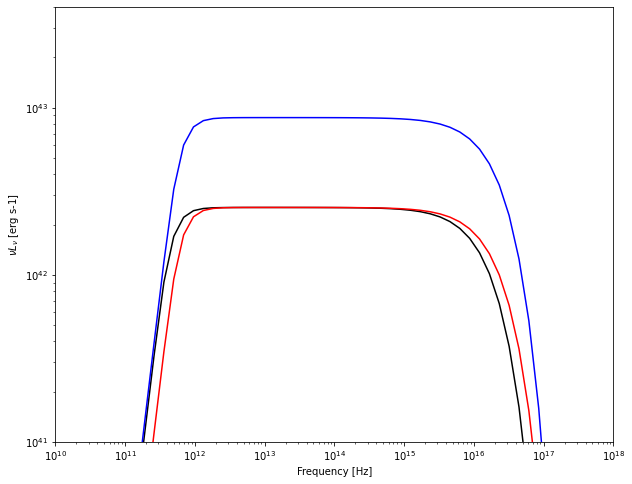

In [8]:
boost_p1 = [0.3, 0, -1] # Not physical but for testing purposes
sync_h_b1 = homo_sp.compute_synchrotron(nus, ne, [R, incang], B, params, boost_p1)
boost_p2 = [0.3, 0, 3]
sync_h_b2 = homo_sp.compute_synchrotron(nus, ne, [R, incang], B, params, boost_p2)
plt.figure(figsize=(10, 8))
plt.loglog(nus, sync_h*nus, 'k-')
plt.loglog(nus, sync_h_b1*nus, 'r-')
plt.loglog(nus, sync_h_b2*nus, 'b-')
plt.ylabel(r"$\nu L_\nu$ [erg s-1]")
plt.xlabel("Frequency [Hz]")
plt.xlim([1e10, 1e18])
plt.ylim([1e41, 4e43]);